# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataset

In [4]:
df = pd.read_csv('Ice_cream_selling_data.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


/tmp/ipykernel_785/2248549949.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


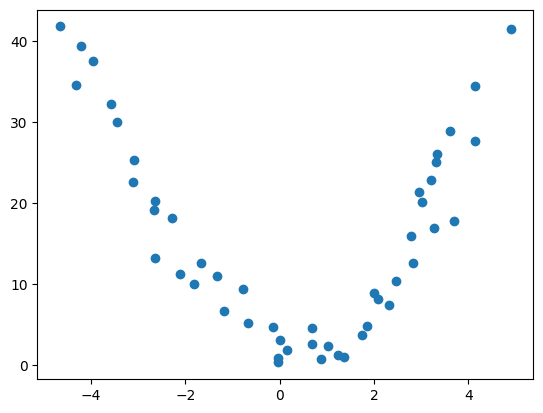

In [5]:
X = df['Temperature (°C)']
Y = df['Ice Cream Sales (units)']

fig, ax = plt.subplots(1,1)
ax.scatter(X, Y)
fig.show()

# Building Algorithm

In [6]:
class PolynomialRegression:
    def __init__(self, learning_rate:float, epochs:int):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta_vector = np.array([])
    
    def fit(self, features, labels):
        df = pd.DataFrame()
        df['X0'] = np.ones((features.shape[0]))
        df['X'] = np.array(features)
        df['X2'] = np.array(features)**2
        df['y'] = np.array(labels)

        X = np.array(df.drop(columns='y'))
        Y = np.array(df['y'])

        Y = Y.reshape((Y.size, 1))

        self.theta_vector = np.zeros((len(list(df.columns)[:-1]), 1))

        m = Y.shape[0]

        for _ in range(self.epochs):
            predictions = np.matmul(X, self.theta_vector)

            errors = predictions - Y

            self.theta_vector = self.theta_vector - (self.learning_rate/m)*np.matmul(X.T, errors)
        
    def predict(self, x_test:float):
        y_pred = self.theta_vector[0] + self.theta_vector[1]*x_test + self.theta_vector[2]*(x_test**2)
        return(y_pred)

# Testing the model

In [37]:
model = PolynomialRegression(0.01, 100)

In [38]:
model.fit(X, Y)

In [39]:
y_p = []
X_n = list(X)

for i in X_n:
    y_pred = model.predict(i)
    y_p.append(y_pred[0])

/tmp/ipykernel_785/2505533717.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


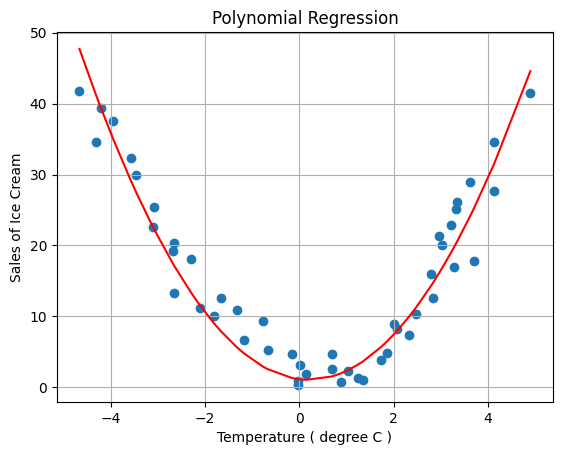

In [40]:
fig, ax = plt.subplots(1,1)
ax.scatter(X, Y)
ax.plot(X_n, y_p, color='red')
ax.set_xlabel('Temperature ( degree C )')
ax.set_ylabel('Sales of Ice Cream')
ax.grid(True)
ax.set_title("Polynomial Regression")
fig.show()